La exploración está hecha basada en este tutorial
https://www.hackersrealm.net/post/titanic-dataset-analysis-using-python

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Índice
* [Carga de datos](#carga)
* [Análisis exploratorio de datos](#exploración)
    * [Datos categóricos](#datoscategoricos)
    * [Datos numéricos](#datosnumericos)

# Carga de datos <a class="anchor" id="carga"></a>

In [35]:
train = pd.read_csv("./titanic_data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Se observa que hay características (features) 

Categóricas:

    * Survived: 0 o 1   
    * Pclass:  1, 2 o 3
    * Sex: male o female
    * Embarked: S (Southampton), C (Cherbourg) o Q (Queenstown)

Numéricas:

    * PassengerId
    * Age
    * SibSp (número de hermanos o esposo de una persona a bordo) - en el tutorial figuraban como categóricas
    * Parch (número de padres o hijos a bordo) - en el tutorial figuraban como categóricas
    * Fare (tarifa)

Otras:

    * Name
    * Ticket
    * Cabina

In [41]:
test = pd.read_csv("./titanic_data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# información estadística con seaborn
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Info del pandas
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Análisis exploratorio de datos<a class="anchor" id="exploración"></a>

## Datos categóricos<a class="anchor" id="datoscategoricos"></a>

En la tabla de entrenamiento, ¿cuántos sobrevivieron?

<AxesSubplot: ylabel='count'>

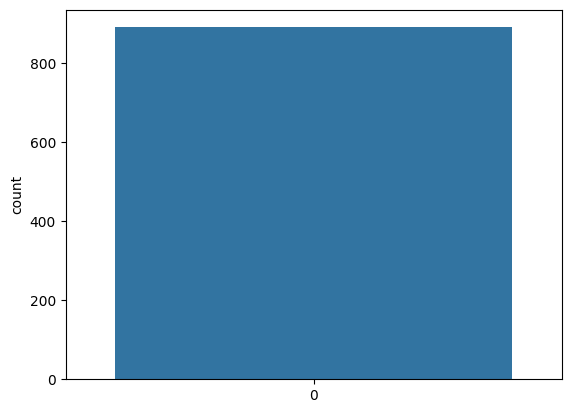

In [37]:
# En el tutorial dice 
sns.countplot(train['Survived'])
# pero arma una sola columna sin saber que poner en el eje x

<AxesSubplot: xlabel='Survived', ylabel='count'>

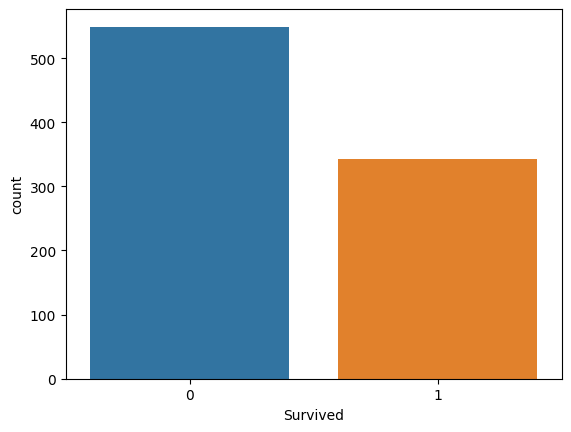

In [39]:
# En cambio, ahora le digo qué poner y va bene
sns.countplot(train,x = train["Survived"])

¿Cuántos había de primera, segunda y tercera clase?

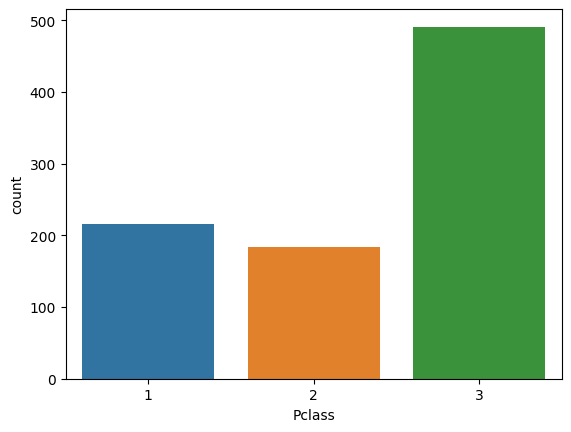

In [40]:
sns.countplot(train,x = train["Pclass"])
plt.show() # para que no muestre el <AxesSubplot...

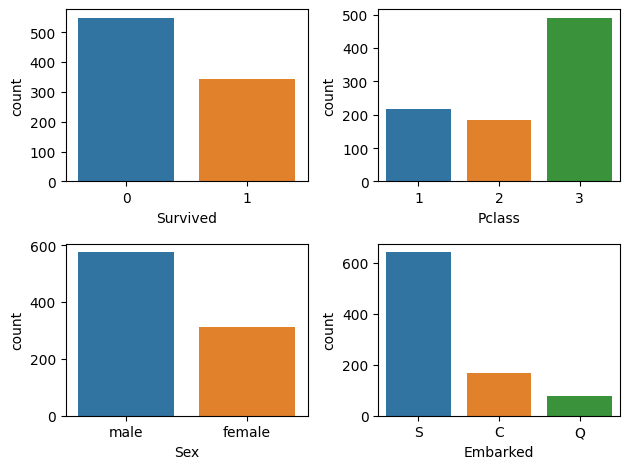

In [46]:
# Como hay cuatro conjuntos de datos categóricos, los dibujo todos juntos
fig, axes = plt.subplots(2, 2)
sns.countplot(train,x = train["Survived"],ax=axes[0,0])
sns.countplot(train,x = train["Pclass"],ax=axes[0,1])
sns.countplot(train,x = train["Sex"],ax=axes[1,0])
sns.countplot(train,x = train["Embarked"],ax=axes[1,1])
fig.tight_layout() # Para que no se superpongan los gráficos
plt.show()

## Datos numéricos <a class="anchor" id="datosnumericos"></a>

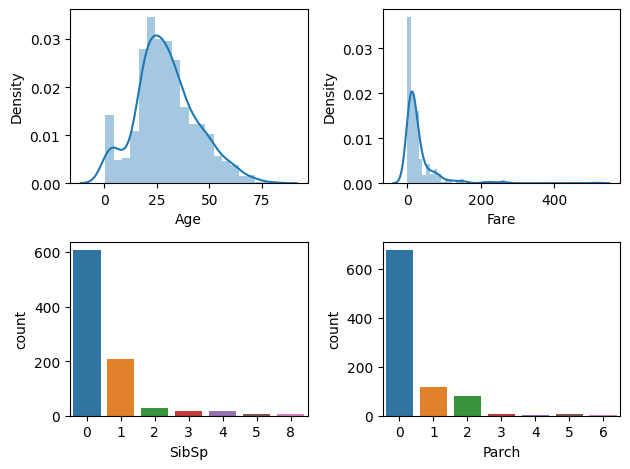

In [56]:
# Como hay cuatro conjuntos de datos numéricos (excepto el de Id), los dibujo todos juntos
fig, axes = plt.subplots(2, 2)
sns.distplot(train["Age"],ax=axes[0,0])
sns.distplot(train["Fare"],ax=axes[0,1])
sns.countplot(train,x = train["SibSp"],ax=axes[1,0])
sns.countplot(train,x = train["Parch"],ax=axes[1,1])
fig.tight_layout() # Para que no se superpongan los gráficos
plt.show()

## Combinaciones de datos

¿Cuál es el precio promedio por cada clase?

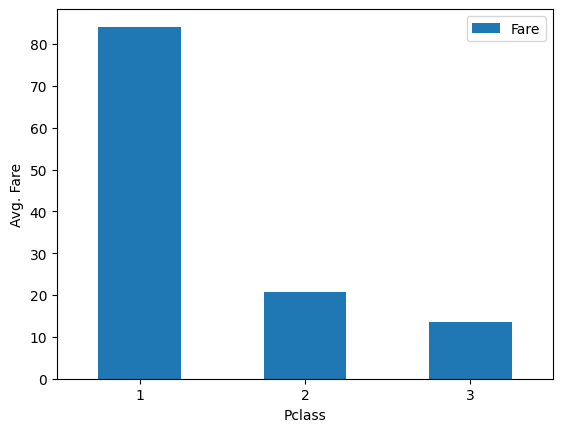

In [88]:
class_fare = train.pivot_table(index='Pclass', values='Fare') # por default tiene aggfunc='mean'
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

La misma tabla pero con la sumatoria

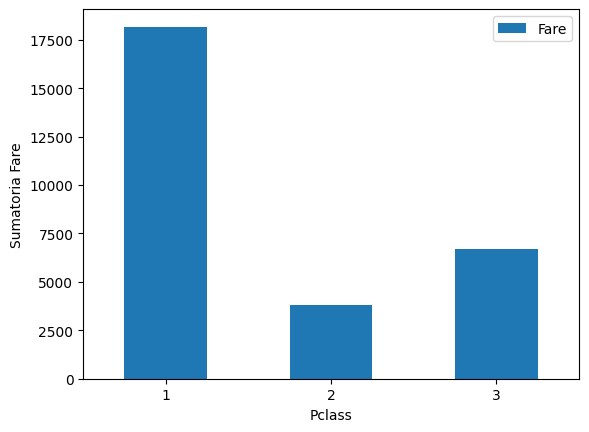

In [91]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Sumatoria Fare')
plt.xticks(rotation=0)
plt.show()

Estas dos combinaciones no nos dijeron nada acerca de si sobrevivieron o no...

Ahora sí. De cada clase ¿cuántos sobrevivieron?

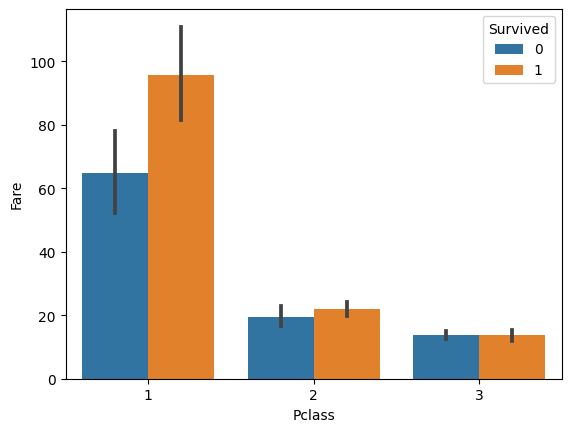

In [93]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')
plt.show()

Se observa una tendencia a que de cada clase sobrevivan los que más tarifa pagaron.

Proporciones de sobrevivientes. El siguiente gráfico muestra el promedio, que como está entre 0 y 1, directamente da la proporción de sobrevivientes por clase. Más del 60% de primera, casi 50% de segunda y aprox 25% de tercera. 

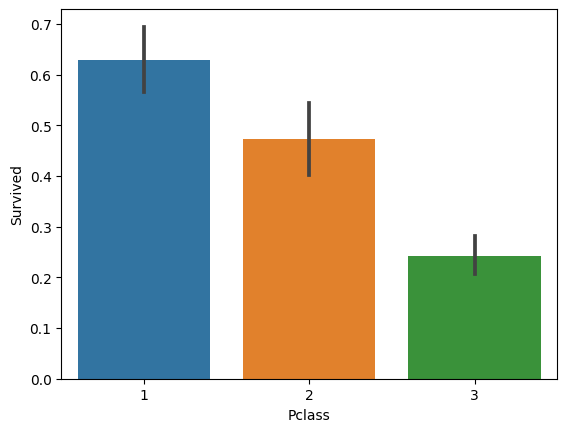

In [130]:
sns.barplot(data=train, x='Pclass', y='Survived')
plt.show()

Ahora busco la misma información, pero a mano

In [166]:
clase=train["Pclass"]
sobre=train["Survived"]

In [155]:
c1=clase==1
c2=clase==2
c3=clase==3
sobre_relacion=np.array([np.sum(sobre[c1])/np.sum(c1),np.sum(sobre[c2])/np.sum(c2),np.sum(sobre[c3])/np.sum(c3)])

In [174]:
print(f"Relación de sobrevivientes de primera: {sobre_relacion[0]:.3f}")
print(f"Relación de sobrevivientes de segunda: {sobre_relacion[1]:.3f}")
print(f"Relación de sobrevivientes de tercera: {sobre_relacion[2]:.3f}")

Relación de sobrevivientes de primera: 0.630
Relación de sobrevivientes de segunda: 0.473
Relación de sobrevivientes de tercera: 0.242
